# Federico Ariton
### Higher Diploma in Science in Data Analytics for Business
### CA 1 Data Visualisation Techniques
### Student Number:sba22090

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore') 

In [2]:
Games = pd.read_csv('vgsales.csv')
Games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
Games.head(50)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
Games.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [4]:
Games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [11]:
missing_years = Games[Games['Year_of_Release'].isna()]

missing_count = missing_years.shape[0]
missing_years.head(), missing_count


(                           Name Platform  Year_of_Release     Genre  \
 183             Madden NFL 2004      PS2              NaN    Sports   
 377            FIFA Soccer 2004      PS2              NaN    Sports   
 456  LEGO Batman: The Videogame      Wii              NaN    Action   
 475  wwe Smackdown vs. Raw 2006      PS2              NaN  Fighting   
 609              Space Invaders     2600              NaN   Shooter   
 
                                   Publisher  NA_Sales  EU_Sales  JP_Sales  \
 183                         Electronic Arts      4.26      0.26      0.01   
 377                         Electronic Arts      0.59      2.36      0.04   
 456  Warner Bros. Interactive Entertainment      1.80      0.97      0.00   
 475                                     NaN      1.57      1.02      0.00   
 609                                   Atari      2.36      0.14      0.00   
 
      Other_Sales  Global_Sales  Critic_Score  Critic_Count User_Score  \
 183         0.71     

In [12]:
# Grouping by 'Name' and filtering out those where 'Year_of_Release' is available
year_by_title = Games.groupby('Name')['Year_of_Release'].apply(lambda x: x.dropna().unique())

# Function to fill missing years
def fill_missing_year(row):
    if pd.isna(row['Year_of_Release']):
        # Check if the game name exists in the year_by_title series and has non-empty data
        if row['Name'] in year_by_title and len(year_by_title[row['Name']]) > 0:
            return year_by_title[row['Name']][0]  # Return the first year found
    return row['Year_of_Release']

# Apply the function to fill missing years
Games['Year_of_Release'] = Games.apply(fill_missing_year, axis=1)

# Check the number of missing 'Year_of_Release' after filling
new_missing_years_count = Games['Year_of_Release'].isna().sum()
new_missing_years_count


146

In [13]:
Games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     146
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [14]:
Games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [15]:
# Converting 'User_Score' to numeric, setting errors='coerce' to convert non-numeric values to NaN
Games['User_Score'] = pd.to_numeric(Games['User_Score'], errors='coerce')

# Check the data types and first few rows to confirm the conversion
Games.dtypes, Games.head()


(Name                object
 Platform            object
 Year_of_Release    float64
 Genre               object
 Publisher           object
 NA_Sales           float64
 EU_Sales           float64
 JP_Sales           float64
 Other_Sales        float64
 Global_Sales       float64
 Critic_Score       float64
 Critic_Count       float64
 User_Score         float64
 User_Count         float64
 Developer           object
 Rating              object
 dtype: object,
                        Name Platform  Year_of_Release         Genre Publisher  \
 0                Wii Sports      Wii           2006.0        Sports  Nintendo   
 1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
 2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
 3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
 4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   
 
    NA_Sales  EU_Sales  JP_Sales  Other_Sa

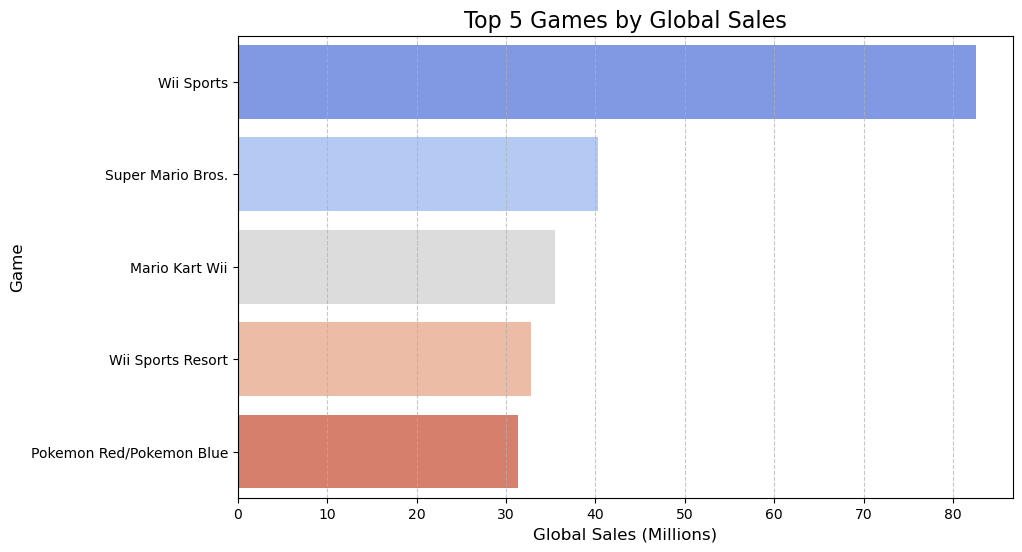

,Name,Global_Sales
0,Wii Sports,82.53
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52
3,Wii Sports Resort,32.77
4,Pokemon Red/Pokemon Blue,31.37


In [19]:
top_games = Games.nlargest(5, 'Global_Sales')

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Global_Sales', y='Name', data=top_games, palette='coolwarm')
plt.title('Top 5 Games by Global Sales', fontsize=16)
plt.xlabel('Global Sales (Millions)', fontsize=12)
plt.ylabel('Game', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Displaying the top games
top_games[['Name', 'Global_Sales']]